# Central Limit Theorem
## Author: Snigdhayan Mahanta
The Central Limit Theorem states that if there is a population with mean = $\mu$ and standard deviation = $\sigma$ and one draws "sufficiently large" random samples from the population with replacement, then the distribution of the sample means will be approximately normal. Moreover, $\mu$ and $\sigma$ can be estimated from the sample means in a manner explained below.

In [1]:
# Create random population data of reasonable size
pop_size <- 100000000
min_value <- 10
max_value <- 1000
set.seed(123)
population1 <- runif(0.8*pop_size, min = min_value, max = max_value) # uniformly distributed between min_value and max_value 
population2 <- runif(0.2*pop_size, min = -max_value, max = -min_value) # uniformly distributed between -max_value and -min_value 
population <- c(population1, population2) # combined population
# population <- rbinom(pop_size, 1, 0.3) # a different population

In [2]:
# Compute actual mean and standard deviation of the population
mu <- mean(population)
sigma <- sd(population)

In [3]:
# Define sampling mechanism - no. of sampling trials and sample size for each trial
trials = 1000
sample_size = 1000 # in this context this sample size is "sufficiently large"

In [4]:
# Generate sample statistics - draw a random sample and compute its mean; repeat the procedure for the selected no. of trials
mySample <- numeric(trials)
for (i in c(1:trials)) {
  sample <- sample(population, size = sample_size, replace = TRUE)
  mySample[i] <- mean(sample)
}

In [5]:
# Compute estimates for mean and standard deviation from the data generated by the trials
mu_estimate <- mean(mySample) # mean of sample means is a good estimate for population mean
sigma_sample <- sd(mySample)
sigma_estimate <- sigma_sample*sqrt(sample_size) # standard deviation of sample means is biased and needs to be adjusted

In [6]:
# Compare the estimated parameters with the actual ones
result <- cbind(" " = c("Actual", "Estimated"),
                "Mean" = c(mu, mu_estimate),
                "Standard Deviation" = c(sigma, sigma_estimate))

In [7]:
# Compare the actual and the estimated values of mean and standard deviation
result

,Mean,Standard Deviation
Actual,302.987882710586,494.82438465095
Estimated,302.41708314899,502.939129284413


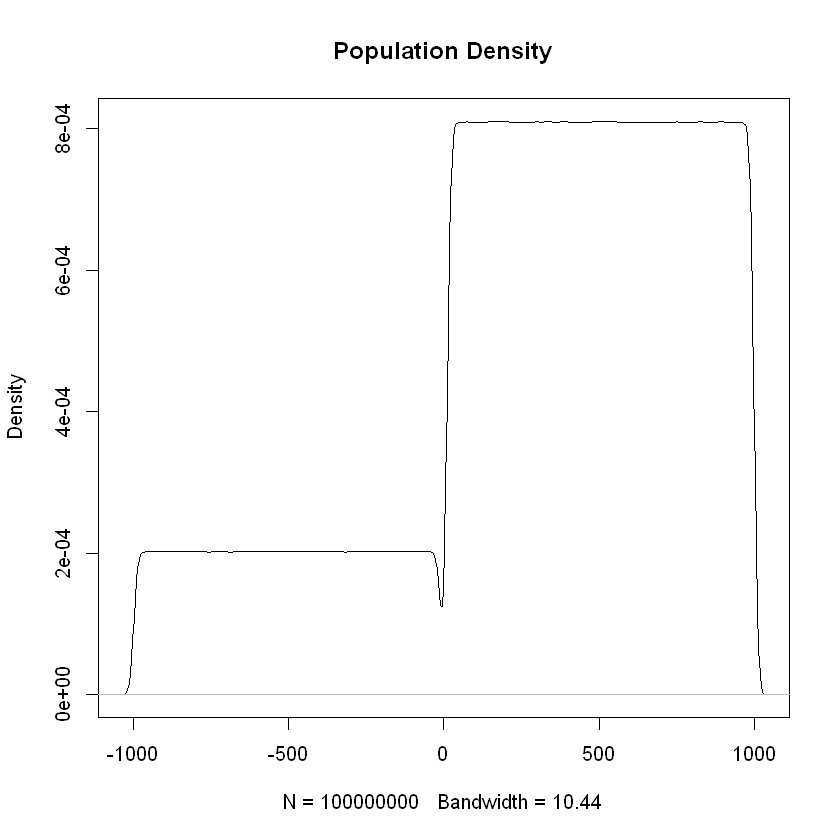

In [8]:
# Plot population density
plot(density(population), main = "Population Density")

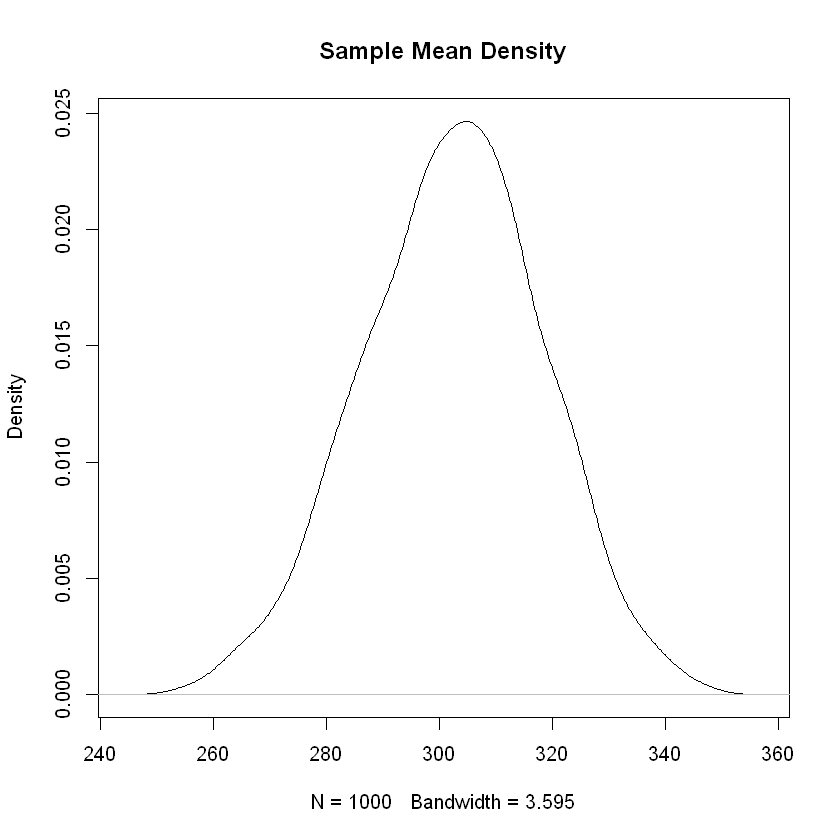

In [9]:
# Plot sample density
plot(density(mySample), main = "Sample Mean Density")

Observe that the sample mean density looks like a Gaussian although the population density (by construction) was not a Gaussian.